# <center>Итоговый проект "Определение социально уязвимых групп населения" #

 ## Часть 2. Анализ и отчистка данных. Разведочный анализ (EDA). ##

Импортируем необходимые библиотеки: 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy.random import seed

import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from IPython.display import display, HTML

from scipy import stats
from scipy.stats import normaltest

from sklearn import mixture
from sklearn.mixture import GaussianMixture

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn import decomposition
from sklearn.decomposition import PCA

from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

plt.rcParams["patch.force_edgecolor"] = True

### <center> 1. Анализ и отчистка данных. ###

#### 1.1. Структура и статистика данных даных.

In [2]:
#  загрузим данные проекта в df
df = pd.read_csv(
    '/home/pavel/Work/Skill_Factory_DSPR/GitHub_Projects/Final_Project/Part_1/data/sp_df_2020.csv', index_col='region')
df.head(3)

,population,area,living_area,per_capita,real_incomes,formal_wage,real_pay,gdpp,income,subsidies,...,respiratory,neoplasms,disabled_18_60,density,spec_mining,spec_manufact,spec_indust,spec_water_supply,spec_provision,spec_reg_prod
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,2317153,167996,18.0,23864,95.5,30072,103.8,291156.9,56637.879730,74306.235370,...,57.302,10.293,61378,13.792906,3.947148e+06,1.561745e+08,1.839420e+08,4.511748e+06,1.930862e+07,3.678839e+08
Амурская область,790044,361908,17.3,35499,100.3,52430,105.2,571362.1,51571.555319,34011.885547,...,30.788,3.568,25069,2.182997,1.477420e+08,4.948314e+07,2.560468e+08,4.393894e+06,5.442775e+07,5.120936e+08
Архангельская область без Ненецкого АО,1092424,413103,16.9,34852,98.4,52779,102.9,514200.4,52963.993010,42447.952872,...,88.038,16.234,26984,2.644435,2.810097e+07,2.372191e+08,3.039603e+08,5.356946e+06,3.328323e+07,6.079205e+08


In [9]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Алтайский край to Ярославская область
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population             85 non-null     int64  
 1   area                   85 non-null     int64  
 2   living_area            85 non-null     float64
 3   per_capita             85 non-null     int64  
 4   real_incomes           85 non-null     float64
 5   formal_wage            85 non-null     int64  
 6   real_pay               85 non-null     float64
 7   gdpp                   85 non-null     float64
 8   income                 85 non-null     float64
 9   subsidies              85 non-null     float64
 10  welfare                85 non-null     float64
 11  mining                 85 non-null     float64
 12  manufact               85 non-null     int64  
 13  indust                 85 non-null     float64
 14  water_supply           85 non-null 

None

**Описание набора данных:**

 * **population** - численность населения региона (чел.);

 * **area** - площадь региона (кв.км);

 * **living_area** - средняя жилая площадь на одного человека;

 * **per_capita** - среднедушевые денежные доходы (в месяц), (руб.);

 * **real_incomes** - реальные денежные доходы, в процентах к предыдущему году (покупательная способность: с учетом роста цен), (руб.);

 * **formal_wage** - среднемесячная номинальная начисленная заработная плата (руб.);

 * **real_pay** - реальная начисленная заработная плата, в процентах к предыдущему году (покупательная способность: с учетом роста цен) (руб.);

 * **gdpp** - валовой региональный продукт на душу населения (руб.);

 * **income** - доходы региона, получаемые из налогов, акцизов, использования имущества(руб.);

 * **subsidies** - дотации из бюджетов других уровней (зачастую федерального) (руб.); 
 
 * **welfare** - расходы на социальную политику от общих расходов бюджета региона (%);

 * **mining** - объем добычи полезных ископаемых (млн.руб.);

 * **manufact** - объем обрабатывающих производств (млн.руб.);

 * **indust** - объем промышленного производства (млн.руб.);

 * **water_supply** - объем водоснабжения, организации сбора и утилизации отходов (млн.руб.);
 
 * **provision** - объем обеспечения электроэнергией, газом и паром (млн.руб.);

 * **reg_prod_total** - общий объем регионального производства (млн.руб.);

 * **retail** - объем розничной торговли на душу населения за год (млн.руб);

 * **poverty_percent** - доля населения региона, живущих за чертой бедности (%);

 * **ps_child** - доля детей в возрасте до 16 лет живущих за чертой бедности (%);

 * **ps_empl** - доля людей работоспособного возраста (16-60 лет) живущих за чертой бедности (%);

 * **ps_pens** - доля людей пенсионного возраста (более 60 лет) живущих за чертой бедности (%);

 * **childrens** - колличество детей в регионе (чел.);

 * **child_orphanage** - колличество детей нуждаются в устройстве в семьи (чел.);

 * **child_adopted** - доля детей устроенных в семьи от нуждающихся (чел.);

 * **pension** - размер пенсии (руб.);

 * **pensioners** - колличество пенсионеров региона (чел.);

 * **pensioners_percent** - доля пенсионеров от населения региона (%);

 * **living_wage** - прожиточный минимум региона (руб.);

 * **unemployment_rate** - уровень безработицы (%);

 * **newborn** - рождаемость за год (чел.);

 * **child_mortality_rural** - смертность детей в сельской местности на первом году жизни за год (чел.);

 * **child_mortality_urban** - смертность детей в городской местности на первом году жизни за год (чел.);

 * **child_mortality** - смертность детей на первом году жизни за год (чел.);

 * **morbidity** - число зарегистрированных заболеваний у пациентов с диагнозом, установленном впервые в жизни;

 * **respiratory** - число респираторных заболеваний (на 1 тыс. человек) за год;

 * **neoplasms** - число онкологических заболеваний (на 1 тыс. человек) за год;

 * **disabled_18_60** - число людей трудоспособного возраста с инвалидностью;

 * **density** - плотность населения региона;

 * **spec_mining** - удельный объем региональной добычи полезных искпаемых на душу населения (млн.руб.);

 * **spec_manufact** - удельный объем регионального обраьатывающего производства на душу населения (млн.руб.);

 * **spec_indust** - удельный объем регионального промышленного производства на душу населения (млн.руб.);

 * **spec_water_supply** - удельный водоснабжения, организации сбора и утилизации отходов  на душу населения (млн.руб.);

 * **spec_provision** - удельный объем обеспечения электроэнергией, газом и паром на душу населения (млн.руб.);

 * **spec_reg_prod** - удельный объем регионального производства на душу населения.

Статистика данных:

In [4]:
df.describe()

,population,area,living_area,per_capita,real_incomes,formal_wage,real_pay,gdpp,income,subsidies,...,respiratory,neoplasms,disabled_18_60,density,spec_mining,spec_manufact,spec_indust,spec_water_supply,spec_provision,spec_reg_prod
count,8.500000e+01,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,8.500000e+01,8.500000e+01,85.000000,...,85.000000,85.000000,85.000000,85.000000,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01
mean,1.726454e+06,2.168148e+05,17.154118,33020.517647,98.942353,45361.082353,103.483529,6.676350e+05,8.227449e+04,48247.970957,...,97.169518,13.943447,49338.705882,137.844612,2.024559e+08,2.978037e+08,5.702944e+08,1.402880e+07,4.186074e+07,1.140388e+09
std,1.813677e+06,4.591132e+05,2.286167,14912.478645,2.796272,19827.022626,2.003559,8.135611e+05,1.836545e+05,39556.028648,...,184.868590,29.783420,47367.328482,673.644606,7.027752e+08,2.958836e+08,8.883811e+08,3.029049e+07,3.614118e+07,1.776882e+09
min,4.411100e+04,8.640000e+02,13.600000,16877.000000,92.500000,29083.000000,98.600000,1.421997e+05,4.430547e+03,8158.072232,...,0.549000,0.030000,1068.000000,0.069701,0.000000e+00,1.716924e+06,8.435879e+06,0.000000e+00,7.576544e+05,1.687176e+07
25%,7.334980e+05,2.999700e+04,15.800000,24864.000000,97.300000,33139.000000,102.400000,3.428112e+05,2.309131e+04,25043.711192,...,20.319000,2.168000,23291.000000,4.364506,1.799591e+06,1.349618e+08,2.077731e+08,4.111441e+06,2.110494e+07,4.155462e+08
50%,1.160445e+06,7.148800e+04,16.900000,28596.000000,98.600000,37820.000000,103.200000,4.607202e+05,4.369310e+04,35701.874597,...,50.883000,5.898000,33125.000000,22.356295,1.265122e+07,2.170254e+08,3.536524e+08,7.120357e+06,3.328323e+07,7.073048e+08
75%,2.317153e+06,1.679960e+05,18.100000,33149.000000,100.400000,48286.000000,104.200000,5.829507e+05,7.691324e+04,60516.004249,...,95.112000,13.605000,61378.000000,44.511357,1.279672e+08,4.052401e+08,5.769489e+08,1.114421e+07,4.930161e+07,1.153898e+09
max,1.267808e+07,3.083523e+06,27.800000,89928.000000,110.900000,120641.000000,111.600000,5.206287e+06,1.623741e+06,288463.487807,...,1480.172000,246.383000,275544.000000,4950.440843,5.792427e+09,1.854057e+09,5.961226e+09,2.253248e+08,2.708405e+08,1.192245e+10


В таблице выше можно сделать следующие наблюдения:

    * колличество субъектов РФ -85;

    * средняя жилая площадь на 1 человека - 17.15 кв.м.;

    * среднедушевой доход по стране 33020 руб.;

    * в среднем 15% населения живут за чертой бедности, из них  37% дети.

    * максимальная плотность населения региона - 4950 чел./кв.км.(требует уточнения).

#### 1.2. Выбор признаков для модели кластеризации. ####

Для кластеризации регионов по уровню социального благополучия выберем следующие признаки:

 * ***density*** - плотность населения региона;

 * ***living_area*** - средняя жилая площадь на одного человека;

 * ***per_capita*** - среднедушевые денежные доходы (в месяц), (руб.);

 * ***gdpp*** - валовой региональный продукт на душу населения (руб.);

 * ***income*** - доходы региона, получаемые из налогов, акцизов, использования имущества(руб.);

 * ***subsidies*** - дотации из бюджетов других уровней (зачастую федерального) (руб.); 

 * ***welfare*** - расходы на социальную политику от общих расходов бюджета региона (%);

 * ***retail*** - объем розничной торговли на душу населения за год (млн.руб);
  
 * ***poverty_percent*** - доля населения региона, живущих за чертой бедности (%);

 * ***living_wage*** - прожиточный минимум региона (руб.);
  
 * ***unemployment_rate*** - уровень безработицы (%);

 * ***spec_reg_prod*** - удельный объем регионального производства на душу населения.

In [5]:
# создадим список выбранных признаков
columns = ['density', 'living_area', 'per_capita', 'gdpp', 'income',
            'subsidies', 'welfare', 'retail', 'poverty_percent', 'living_wage',
            'unemployment_rate', 'spec_reg_prod']

# соберем набор данных с выбранными признаками
model_df = df.loc[:, columns]
model_df.head(3)

,density,living_area,per_capita,gdpp,income,subsidies,welfare,retail,poverty_percent,living_wage,unemployment_rate,spec_reg_prod
region,,,,,,,,,,,,
Алтайский край,13.792906,18.0,23864,291156.9,56637.879730,74306.235370,29.7,153605,17.5,10904,5.9,3.678839e+08
Амурская область,2.182997,17.3,35499,571362.1,51571.555319,34011.885547,21.7,245233,15.2,14331,6.0,5.120936e+08
Архангельская область без Ненецкого АО,2.644435,16.9,34852,514200.4,52963.993010,42447.952872,21.4,250033,12.3,14507,7.4,6.079205e+08


### <center> 2. Разведочный анализ (EDA).

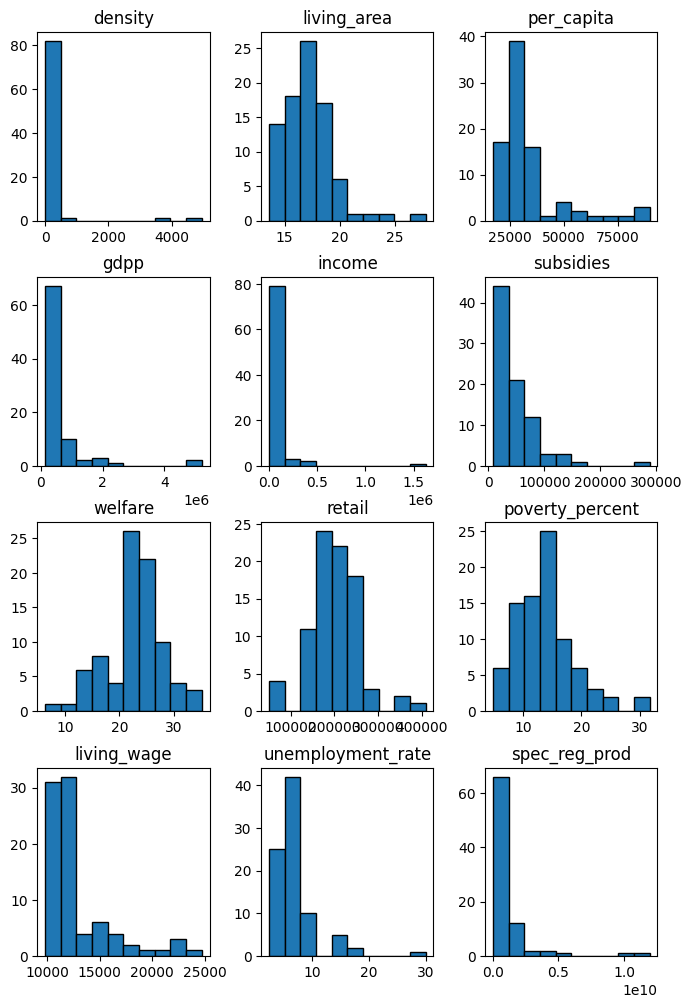

In [10]:
# визуализируем распределение признаков
model_df.hist(figsize=(8, 12), grid = False);
plt.show()

Не все гистограммы имеют симметричный вид, что говорит о наличие нескольких групп.

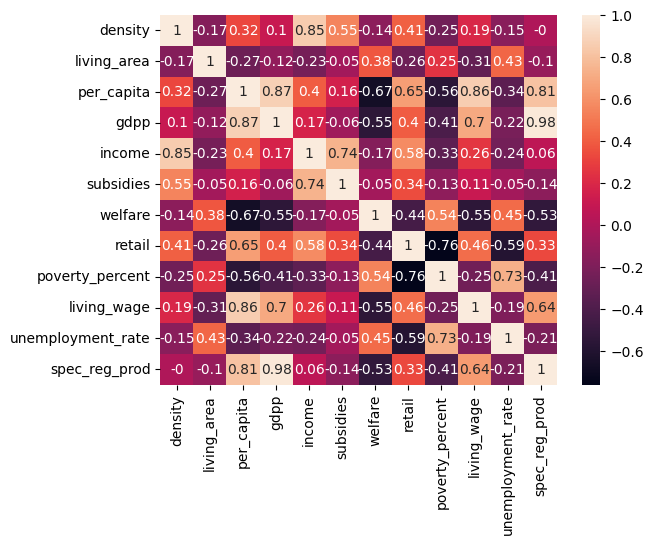

In [7]:
# создадим визуализацию значении матрицы корреляции всех пар признаков в виде тепловой карты

sns.heatmap(model_df.corr().round(decimals=2), annot=True)
plt.show()

Признаки ***gdpp***(валовой региональный продукт) и ***spec_reg_prod***(удельный объем регионального производства на душу населения) имеют сильную линейную зависимость со значением корреляции 0,98, один из таких признаков можно убрать для обучения, так как они  практически одинаковые. Напротив признаки ***welfare***(расходы на социальную политику)  и ***per_capita*** (среднедушевые денежные доходы), ***retail*** (объем розничной торговли) и ***poverty_percent*** (доля населения региона, живущих за чертой бедности) имеют обратную корреляцию со значением -0,67 и -0.75.

Удалим из набора признаки ***spec_reg_prod***. 

In [11]:
model_df = model_df.drop(['spec_reg_prod'], axis=1)
model_df.shape

(85, 11)

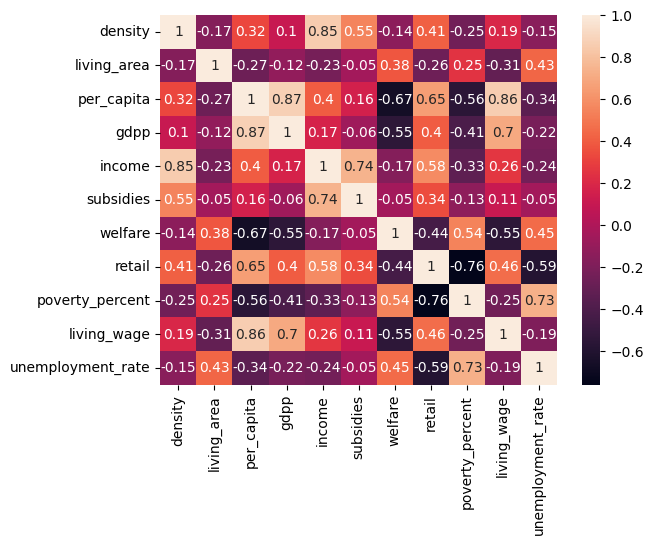

In [12]:
# повторно визуализируем матрицу корреляции всех пар признаков в виде тепловой карты

sns.heatmap(model_df.corr().round(decimals=2), annot=True)
plt.show()

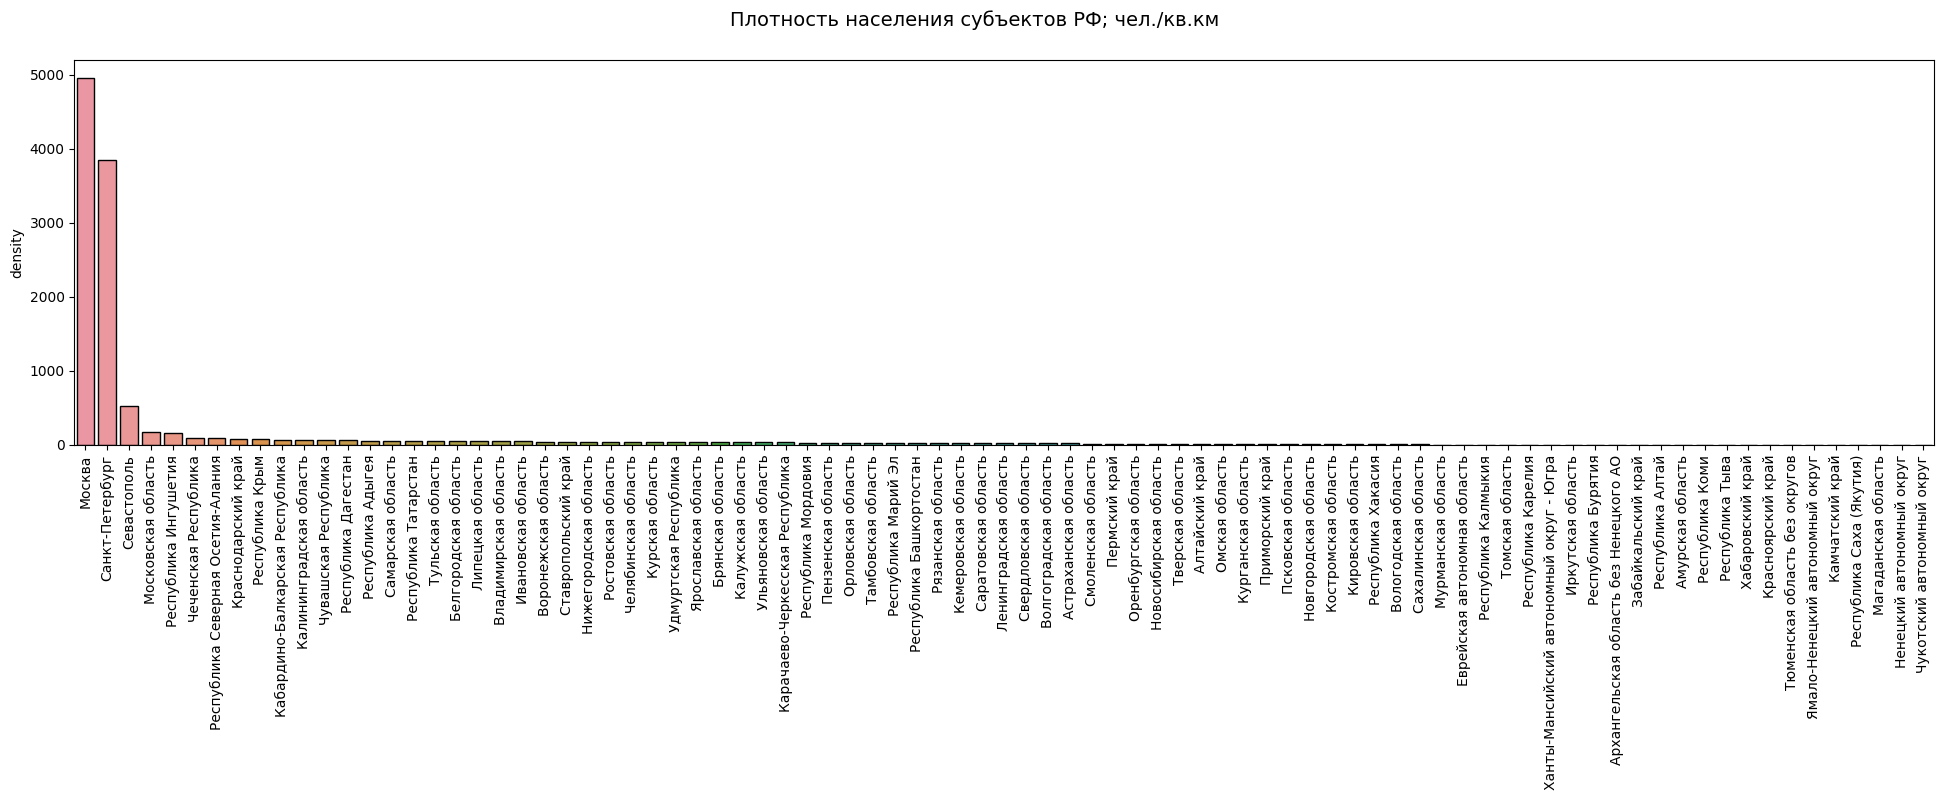

In [13]:
# посмотрим график распределения плотности населения
bar_pl_df = df.sort_values(by='density', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(
    data=bar_pl_df,
    x=bar_pl_df.index,
    y='density'
);
fig.suptitle(
    'Плотность населения субъектов РФ; чел./кв.км',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

Плотность 4950 чел./кв.км соответствеут Москве, что соответсвует действительности.

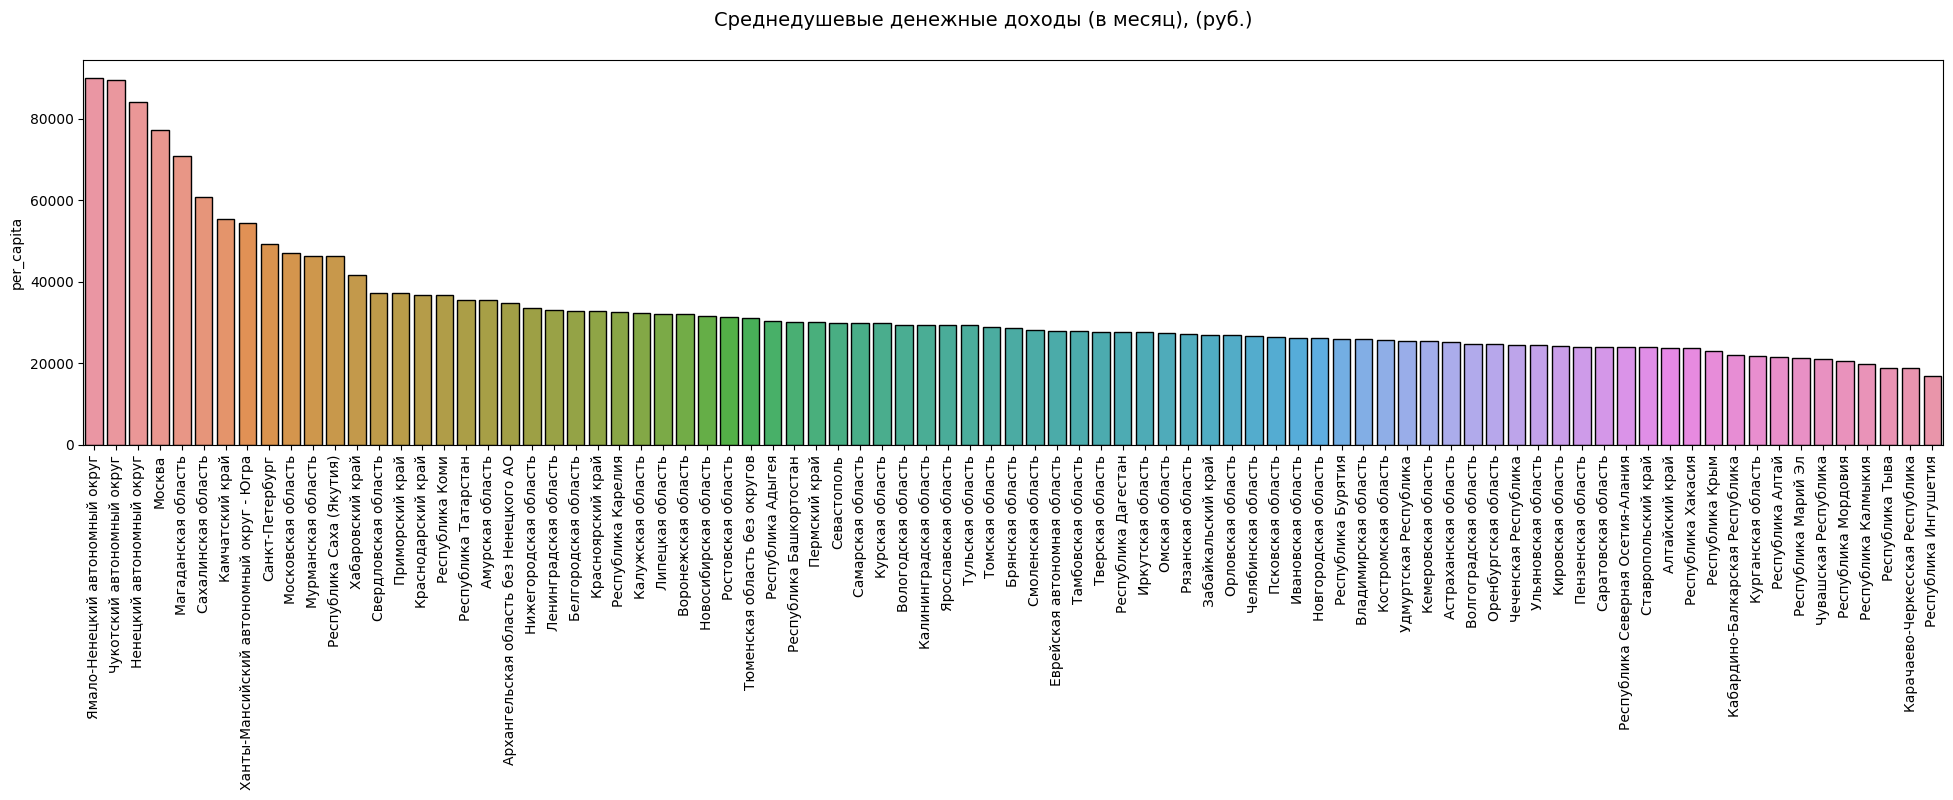

In [14]:
# посмотрим график распределения среднедушевых доходов населения
bar_pl_df = df.sort_values(by='per_capita', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(
    data=bar_pl_df,
    x=bar_pl_df.index,
    y='per_capita'
);
fig.suptitle(
    'Среднедушевые денежные доходы (в месяц), (руб.)',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

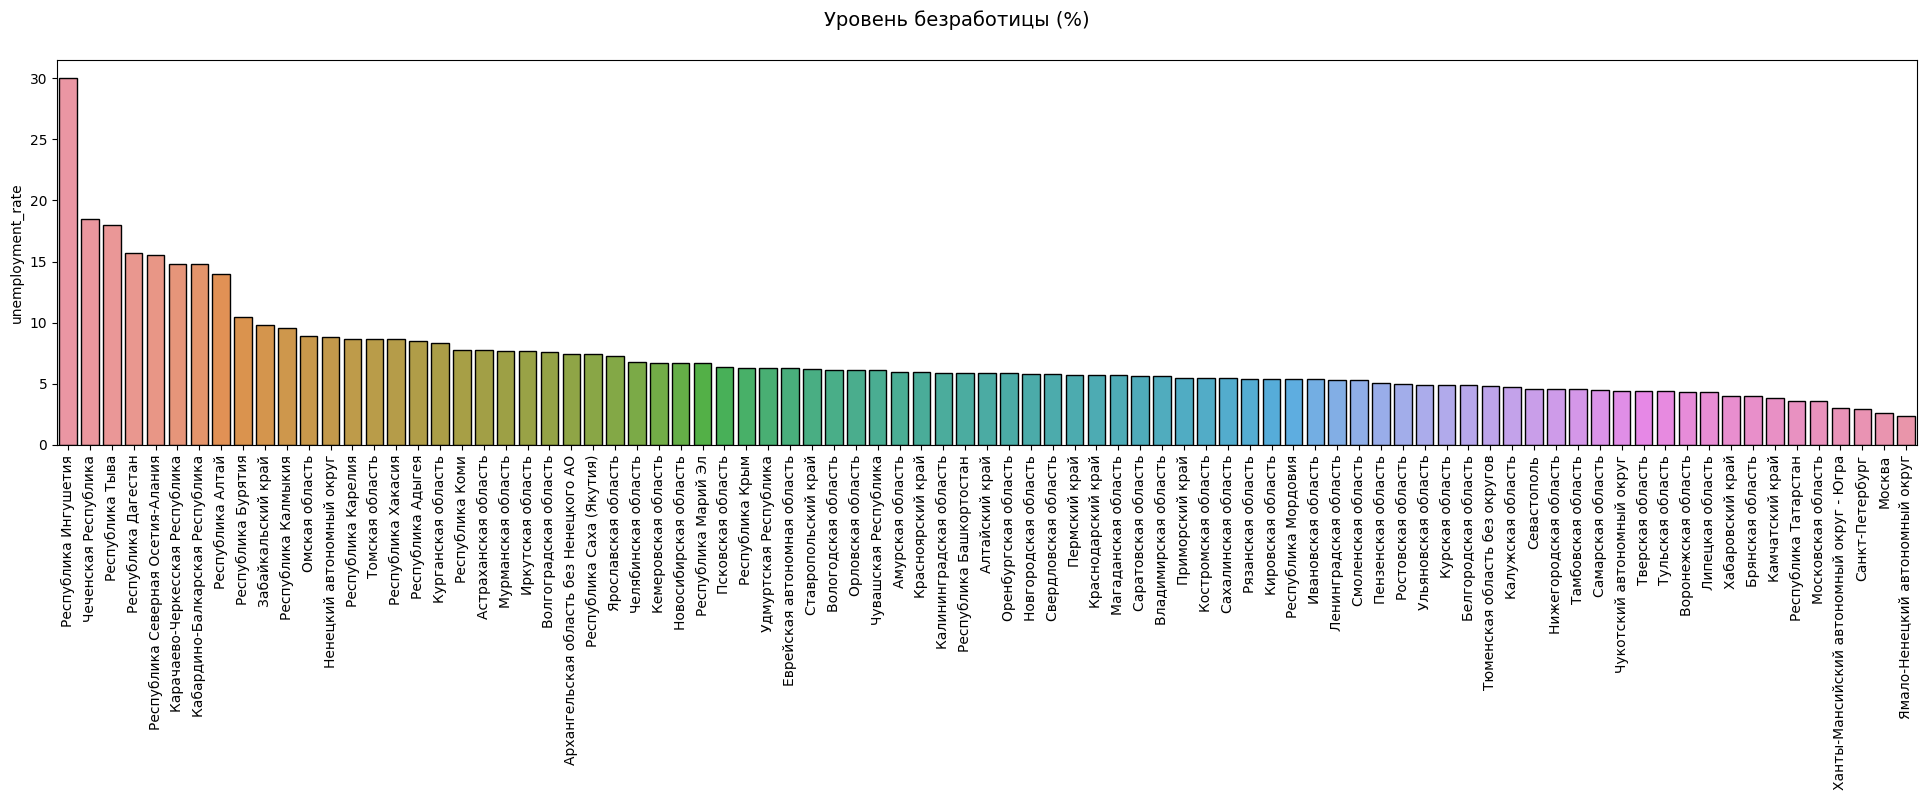

In [15]:
# посмотрим график распределения уровня безработицы
bar_pl_df = df.sort_values(by='unemployment_rate', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(
    data=bar_pl_df,
    x=bar_pl_df.index,
    y='unemployment_rate'
);
fig.suptitle(
    'Уровень безработицы (%)',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

Из графиков выше видно, что для регионов с очень низкой и очень высокой плотностью населения и высокими среднедушевыми доходами характерен низкий уровень безработицы. Что может свидетельствовать о разных причинах этой зависимости. Источник доходов региона и, как следствие, сфера занятости могут влиять на распределение регионов по группам социального благополучия.

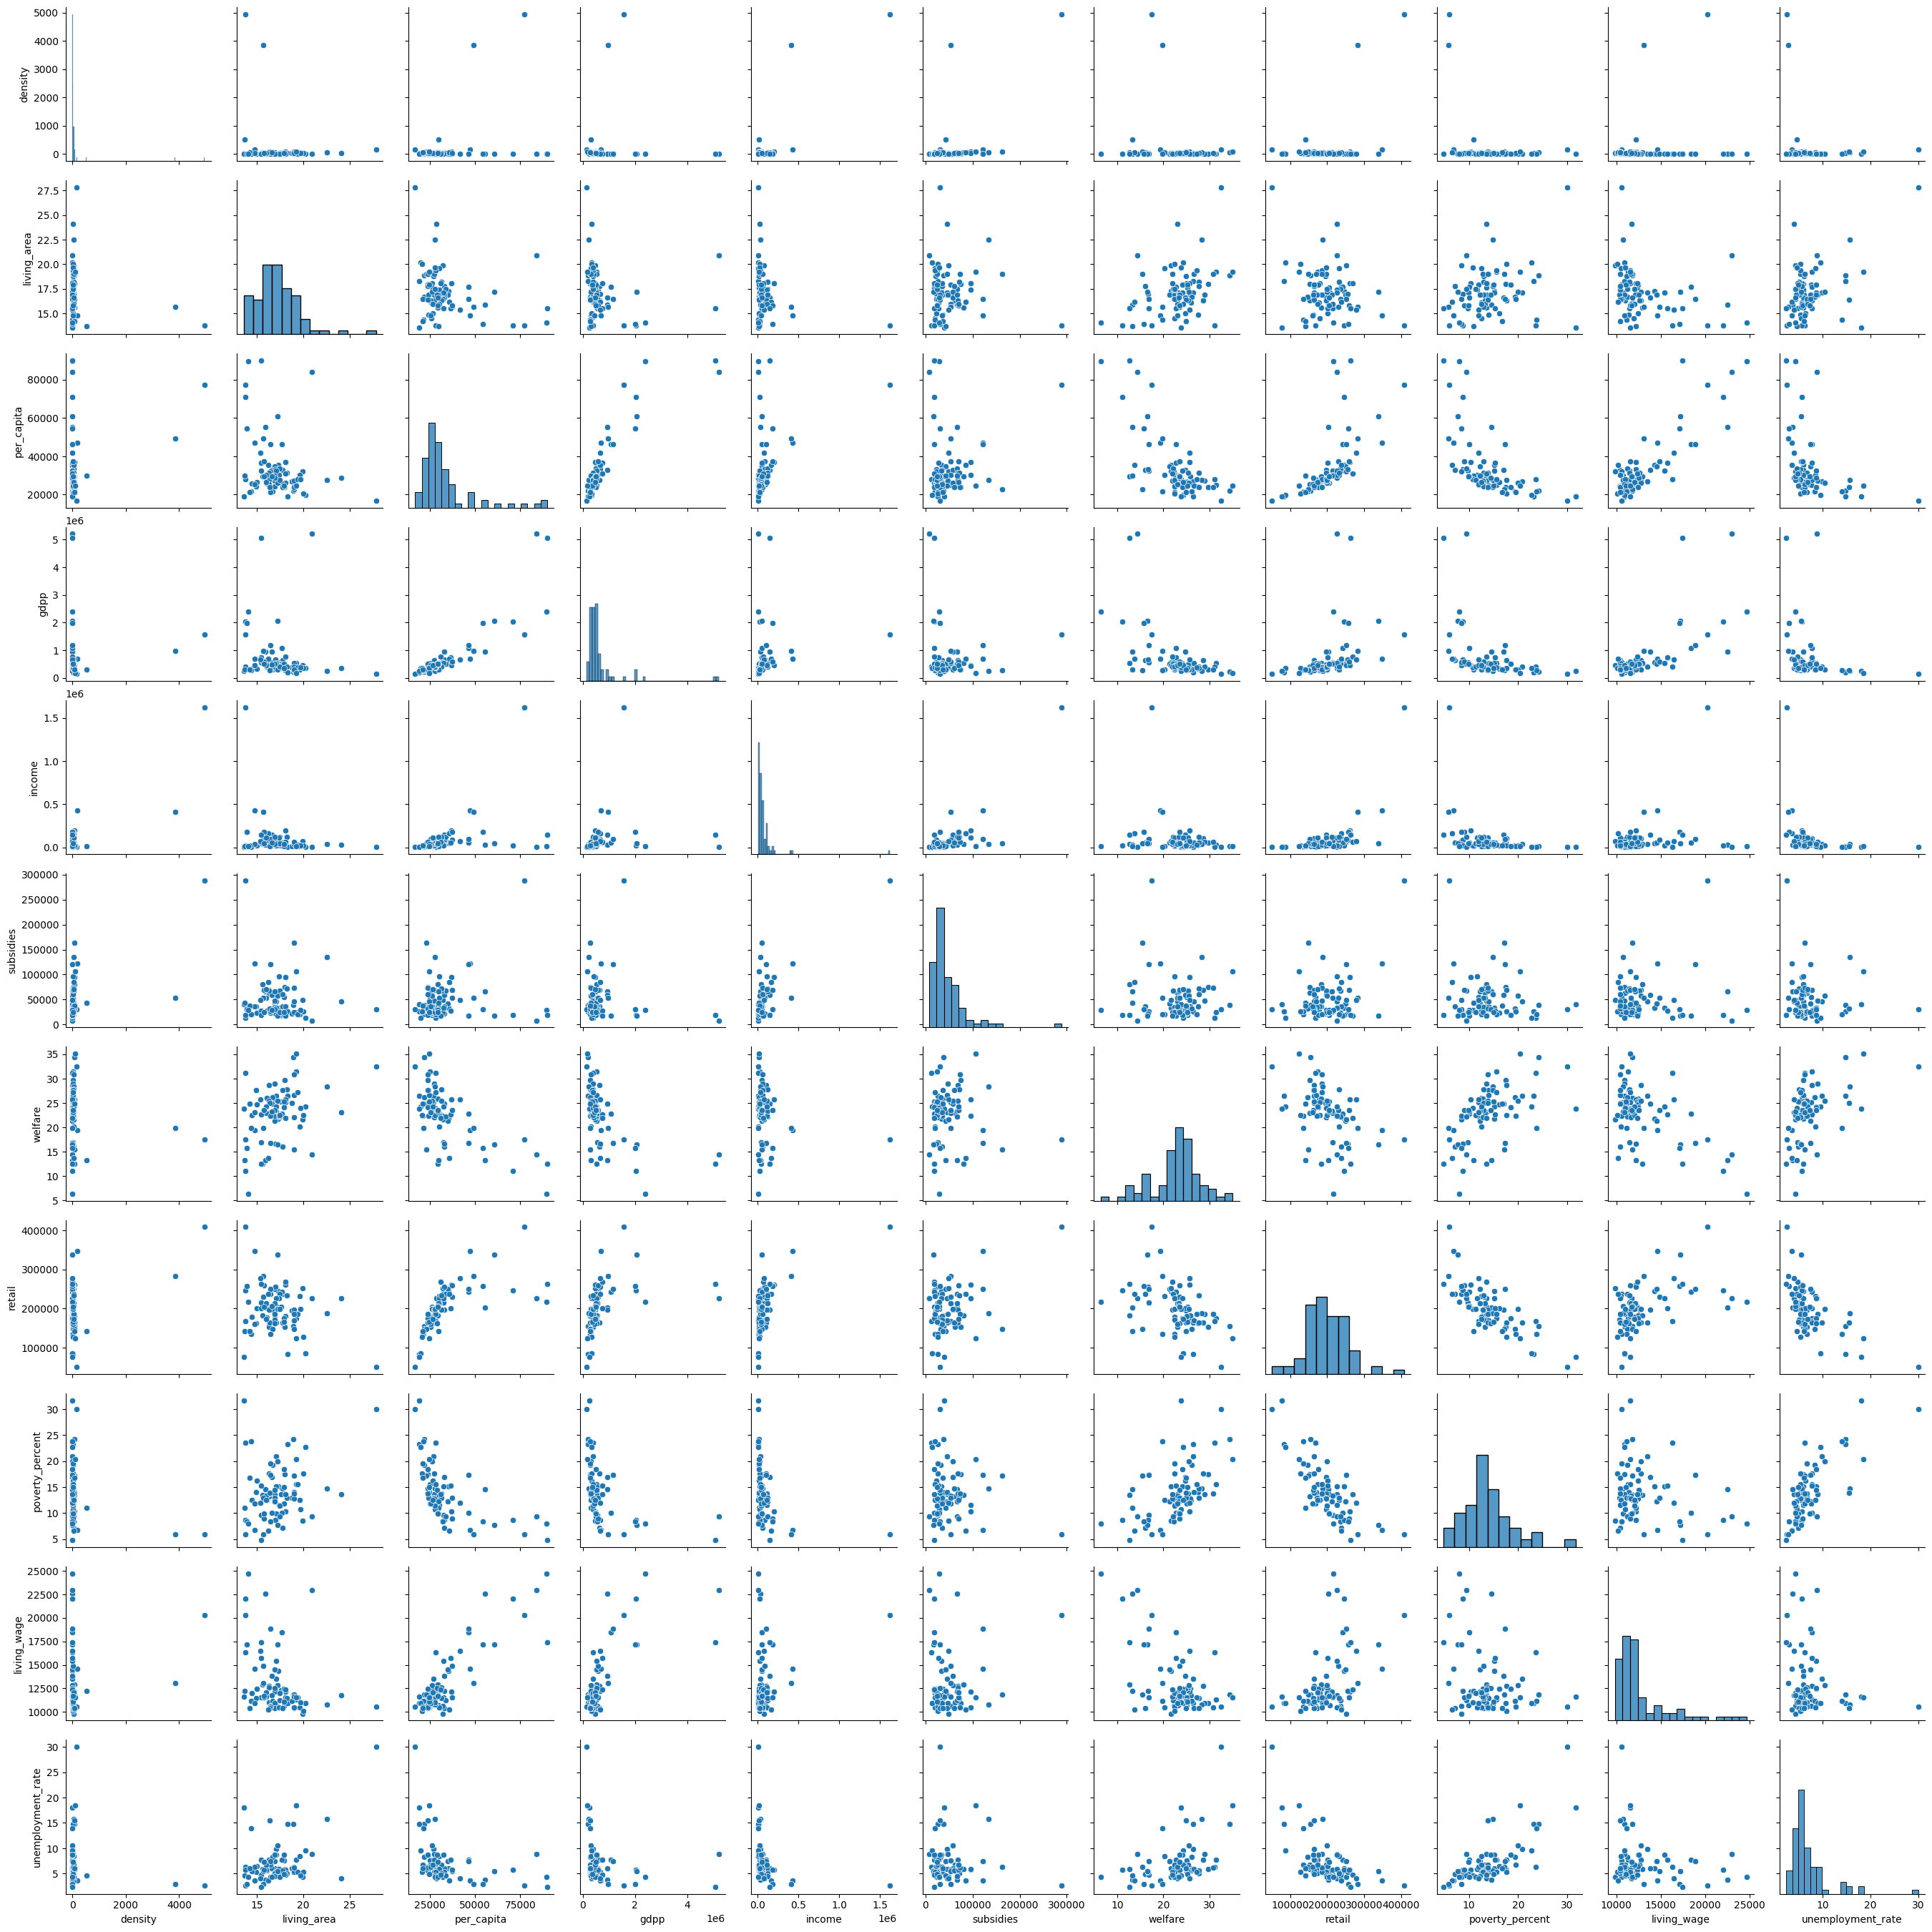

In [16]:
# Создадим матрицу диаграмм разброса для признаков
sns.pairplot(model_df)

Как и на тепловой карте корреляции, пары переменных имеют сильную линейную связь, а другие - обратную линейную связь. Так доходы населения обратно связаны с расходами на соц. политику.

### <center> 3. Cохранение данных.

In [ ]:
model_df.to_csv('./data/model_df.csv')